# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/000

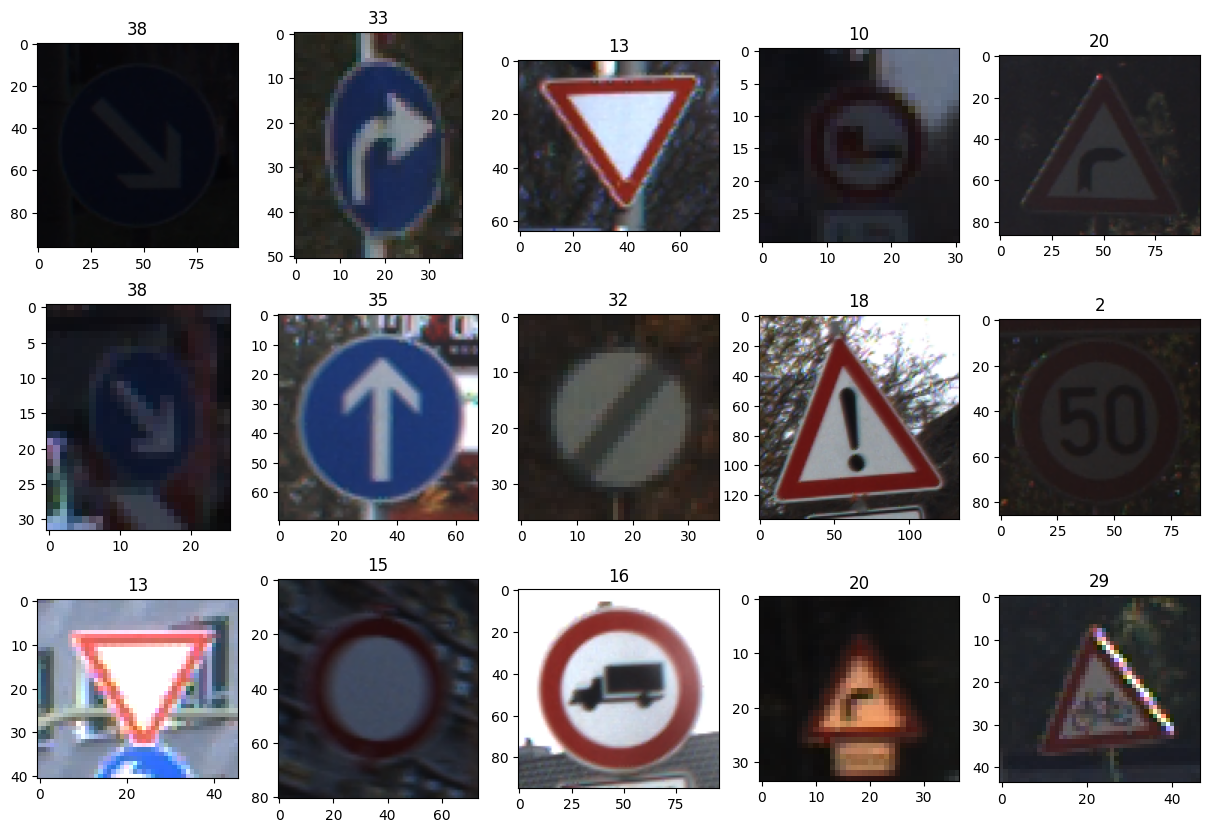

In [6]:
# Load the training labels
root = './data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'

data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

plt.show()

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [31]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].unique()

print('Uniq categories: ', ids)
print('\nCount itemes per categores:\n', data['ClassId'].value_counts())

Uniq categories:  [20  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Count itemes per categores:
 2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
18    1200
35    1200
17    1110
14     780
31     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
6      420
34     420
22     390
36     390
40     360
20     360
21     330
39     300
29     270
24     270
32     240
27     240
41     240
42     240
37     210
0      210
19     210
Name: ClassId, dtype: int64


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

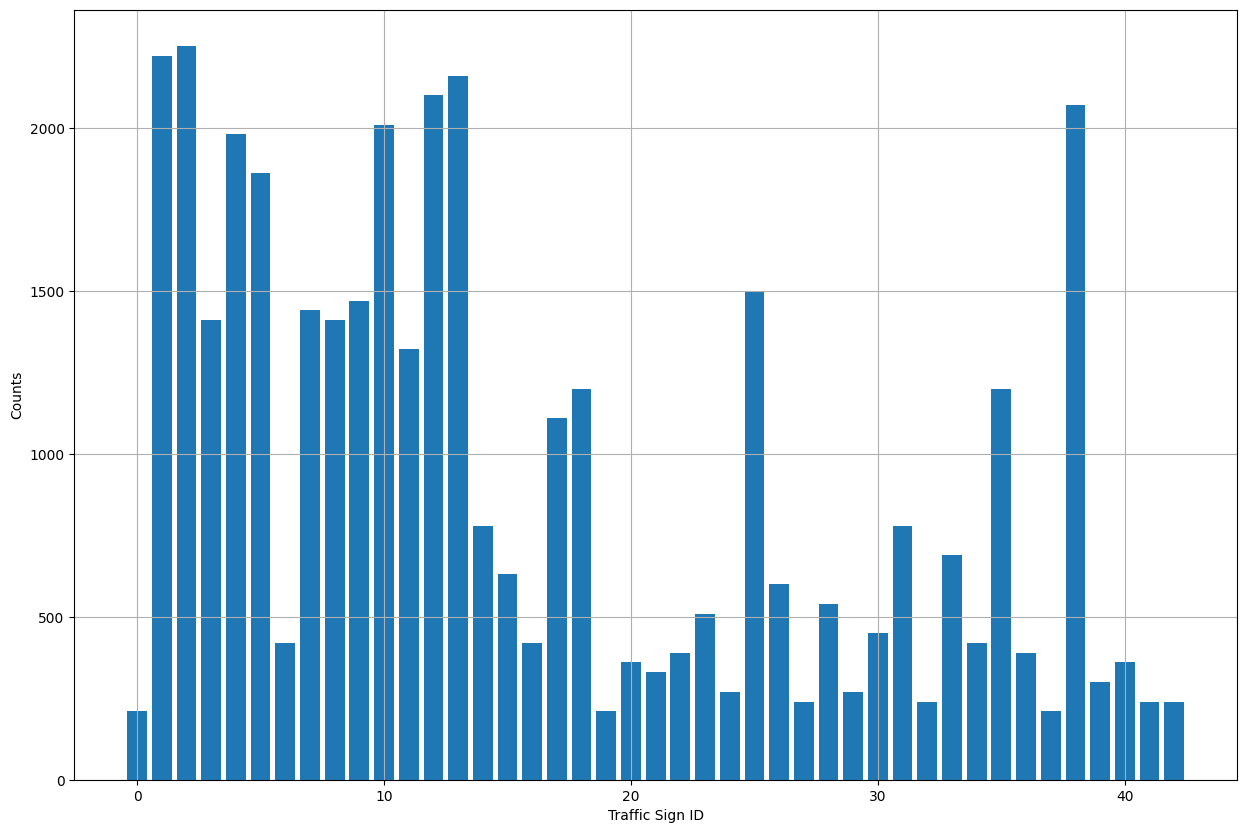

In [32]:
from collections import Counter
hist = Counter(data.to_dict('list')['ClassId'])

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

plt.show()

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

**Dataset is not balanced because the difference between the smallest and biggest category is more than 1000 percent.**

* Are there any classes that are (significantly) over-represented or under-represeneted?

**Under-represeneted classes:**
<pre>
14     780
31     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
6      420
34     420
22     390
36     390
40     360
20     360
21     330
39     300
29     270
24     270
32     240
27     240
41     240
42     240
37     210
0      210
19     210
</pre>

**Over-represeneted classes:**
<pre>
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
</pre>

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

**In addition, images dataset is also is not optimal: illumination, blurring, different resolutions, etc. All this factors should be normalized for trained, validation and test datasets.**